In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1: MADHYA PRADESH rain - yield predictor

In [88]:
#data is in mm of rainfall
#goal is to create a montecarlo simulator of monthly rain in a chosen region 
#(let's choose Madhya Pradesh because supposedly it accounts for most of soybean production at 58% of total india)

url_1 = '../data/district_wise_rainfall_normal.csv'  # https://data.gov.in/catalog/rainfall-i
district_wise_dataset = pd.read_csv(url_1) 
url_2 = '../data/Sub_Division_IMD_2017'
subdiv_df = pd.read_csv(url_2)
district_name_mp = district_wise_dataset["STATE_UT_NAME"].unique()
district_name_mp.sort()
mp_string = district_name_mp[19]
district_wise_dataset.set_index(["STATE_UT_NAME", "DISTRICT"],inplace=True)

In [89]:
list_of_subdivs = subdiv_df['SUBDIVISION'].unique()
list_of_subdivs

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

In [90]:
district_wise_dataset.loc[mp_string]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
DISTRICT,,,,,,,,,,,,,,,,,
BETUL,7.5,8.5,9.3,5.9,6.4,137.0,290.6,293.4,197.5,49.4,13.4,9.9,1028.8,16.0,21.6,918.5,72.7
VIDISHA,14.0,8.2,5.1,1.4,4.4,110.3,356.2,376.0,162.5,24.0,11.9,10.8,1084.8,22.2,10.9,1005.0,46.7
BHIND,10.4,7.1,4.2,1.3,4.6,55.6,221.5,261.4,147.0,39.5,3.9,6.9,763.4,17.5,10.1,685.5,50.3
DATIA,9.1,8.5,5.0,3.4,6.6,62.2,246.0,293.0,174.6,39.8,4.1,7.9,860.2,17.6,15.0,775.8,51.8
DEWAS,7.5,4.0,3.8,1.3,6.2,127.9,311.6,330.7,179.6,34.4,13.5,10.9,1031.4,11.5,11.3,949.8,58.8
DHAR,3.3,1.0,1.4,0.8,4.1,126.4,266.3,261.5,172.6,34.8,11.1,2.8,886.1,4.3,6.3,826.8,48.7
GUNA,12.1,7.1,6.3,2.7,8.6,87.3,336.6,356.0,163.1,28.6,10.6,9.3,1028.3,19.2,17.6,943.0,48.5
GWALIOR,14.5,8.6,5.5,3.7,8.2,71.8,258.0,289.7,171.1,41.5,5.1,8.2,885.9,23.1,17.4,790.6,54.8
HOSHANGABAD,11.8,8.3,9.1,3.2,8.1,140.3,416.6,464.4,267.8,37.4,15.0,10.2,1392.2,20.1,20.4,1289.1,62.6


In [91]:
subdiv_df.set_index(['SUBDIVISION','YEAR'], inplace=True)
west_mp = subdiv_df.loc['West Madhya Pradesh']
east_mp = subdiv_df.loc['East Madhya Pradesh']
#cleaning nans
west_mp.isnull().values.any()
west_mp_annual = west_mp['ANNUAL']
east_mp_annual = east_mp['ANNUAL']
columns_to_drop = west_mp.columns[12:]
east_mp_annual.mean()


1203.0350427350427

In [92]:
#ok prune extra columns
west_mp.drop(columns=columns_to_drop, inplace=True)
east_mp.drop(columns=columns_to_drop, inplace=True)
east_mp

/var/folders/hq/62b5kbn954ggcv_0g7_hdfmh0000gn/T/ipykernel_39546/999589201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_mp.drop(columns=columns_to_drop, inplace=True)
/var/folders/hq/62b5kbn954ggcv_0g7_hdfmh0000gn/T/ipykernel_39546/999589201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_mp.drop(columns=columns_to_drop, inplace=True)


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,48.5,38.1,15.7,10.7,6.2,61.0,367.5,589.2,189.9,5.9,0.0,0.0
1902,14.9,8.9,0.0,3.6,2.7,28.0,411.9,227.0,236.6,17.0,27.6,6.1
1903,5.6,2.9,0.3,0.9,37.5,67.5,261.4,366.7,257.4,177.9,0.0,0.0
1904,2.0,15.3,48.2,0.0,8.6,109.9,443.2,316.6,135.6,44.8,3.2,16.9
1905,15.9,8.0,14.3,12.3,10.2,34.4,292.4,243.3,250.9,2.9,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2.0,43.4,14.1,9.5,0.3,311.9,456.2,480.8,78.0,124.2,0.5,1.0
2014,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9
2015,37.3,11.0,73.4,25.8,6.3,139.2,262.2,272.1,71.6,38.2,1.2,0.9


In [93]:
west_mp = west_mp.fillna(0)
west_mp.isnull().values.any()
east_mp = east_mp.fillna(0)
east_mp.isnull().values.any()
east_mp

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,48.5,38.1,15.7,10.7,6.2,61.0,367.5,589.2,189.9,5.9,0.0,0.0
1902,14.9,8.9,0.0,3.6,2.7,28.0,411.9,227.0,236.6,17.0,27.6,6.1
1903,5.6,2.9,0.3,0.9,37.5,67.5,261.4,366.7,257.4,177.9,0.0,0.0
1904,2.0,15.3,48.2,0.0,8.6,109.9,443.2,316.6,135.6,44.8,3.2,16.9
1905,15.9,8.0,14.3,12.3,10.2,34.4,292.4,243.3,250.9,2.9,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2.0,43.4,14.1,9.5,0.3,311.9,456.2,480.8,78.0,124.2,0.5,1.0
2014,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9
2015,37.3,11.0,73.4,25.8,6.3,139.2,262.2,272.1,71.6,38.2,1.2,0.9


In [94]:
east_mp.to_numpy().reshape(-1,1)
12 * len(east_mp) * 0.1
12 * len(east_mp) - (12 * len(east_mp) * 0.1)
west_mp.to_numpy().reshape(1,-1)[0]
len(east_mp.to_numpy().reshape(1,-1)[0]), len(west_mp.to_numpy().reshape(1,-1)[0])


(1404, 1404)

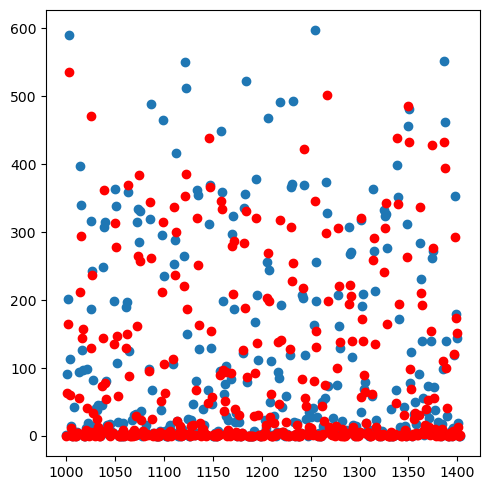

In [95]:
x_axis = np.linspace(0,1403,len(west_mp.to_numpy().reshape(1,-1)[0]))
plt.scatter(x_axis[1000:1404], east_mp.to_numpy().reshape(1,-1)[0][1000:1404])
plt.scatter(x_axis[1000:1404], west_mp.to_numpy().reshape(1,-1)[0][1000:1404], color='red')

In [96]:
covariances = np.cov(west_mp.to_numpy().reshape(1,-1)[0][:], east_mp.to_numpy().reshape(1,-1)[0][:], rowvar = 0)
np.sqrt(covariances)

array([[120.72404889, 128.8616276 ],
       [128.8616276 , 146.54883499]])

In [97]:
np.corrcoef(west_mp.to_numpy().reshape(1,-1)[0][:], east_mp.to_numpy().reshape(1,-1)[0][:])

array([[1.        , 0.93857949],
       [0.93857949, 1.        ]])

Text(0.5, 1.0, 'average rainfall per month in eastern madhya pradesh (in mm)')

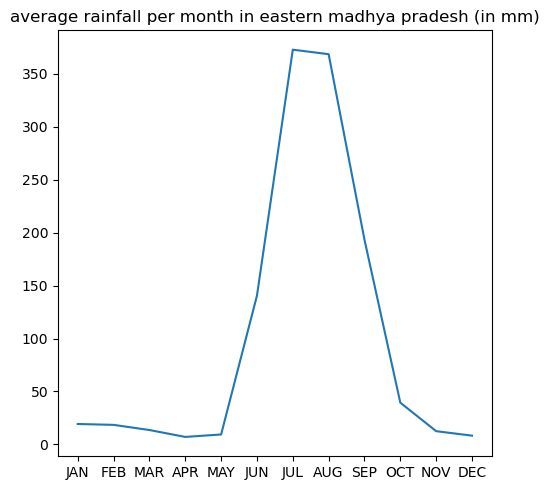

In [98]:
average_east_mp = east_mp.mean()
plt.plot(average_east_mp)
plt.title("average rainfall per month in eastern madhya pradesh (in mm)")

Text(0.5, 1.0, 'average rainfall per month in eastern madhya pradesh (in in)')

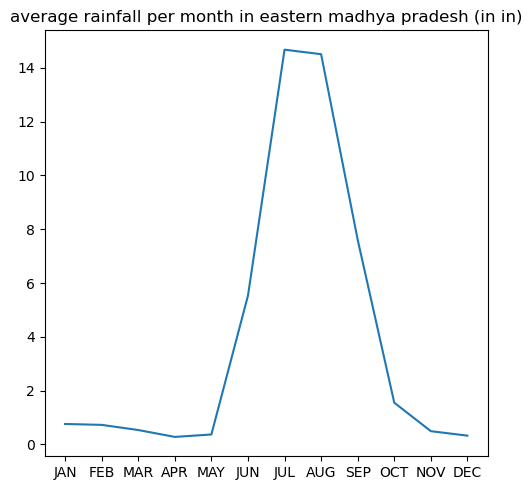

In [99]:
average_east_mp_inches = (east_mp / 25.4).mean()
plt.plot(average_east_mp_inches)
plt.title("average rainfall per month in eastern madhya pradesh (in in)")

Text(0.5, 1.0, 'average rainfall per month in western madhya pradesh (in in)')

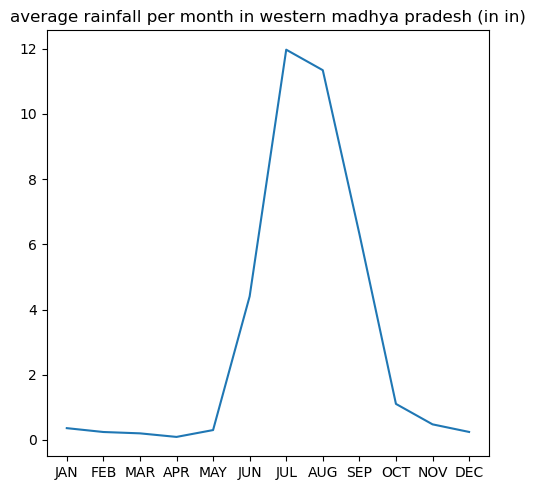

In [100]:
average_west_mp_inches = (west_mp / 25.4).mean()
plt.plot(average_west_mp_inches)
plt.title("average rainfall per month in western madhya pradesh (in in)")

In [101]:
#develop montecarlo simulator of rainfall (ie. random source of rain by random sampling dataset, maybe with weight bias towards more recent years)
# simple idea for now: normal distribution of total rainfall across all 6 months 
west_mp_monsoon = west_mp.drop(columns=['JAN','FEB','MAR','APR','MAY','DEC'])
east_mp_monsoon = east_mp.drop(columns=['JAN','FEB','MAR','APR','MAY','DEC'])
west_mp_monsoon['MONSOON'] = west_mp_monsoon.aggregate(np.sum, axis='columns')
east_mp_monsoon['MONSOON'] = east_mp_monsoon.aggregate(np.sum, axis='columns')
west_mp_monsoon = west_mp_monsoon['MONSOON']
east_mp_monsoon = east_mp_monsoon['MONSOON']
east_mp_monsoon


YEAR
1901    1213.5
1902     948.1
1903    1130.9
1904    1053.3
1905     823.9
         ...  
2013    1451.6
2014     804.9
2015     784.5
2016    1282.1
2017     815.4
Name: MONSOON, Length: 117, dtype: float64

In [102]:
# create normal distribution out of this dataset
east_monsoon_mean = east_mp_monsoon.mean()
east_monsoon_var = east_mp_monsoon.var()
east_monsoon_std = east_mp_monsoon.std()
east_monsoon_std, east_monsoon_std**2, east_monsoon_var

(211.3483630685731, 44668.13057176539, 44668.13057176539)

In [103]:
#set seed = 1302023
rng = np.random.default_rng(1302023)


In [104]:
random_10_years = rng.normal(east_monsoon_mean, east_monsoon_std, size = 10)
random_10_years

array([1306.39246782, 1536.52503375, 1074.25062913, 1338.89866917,
       1371.73164214, 1328.70719344, 1372.11165065,  627.98320763,
        918.69008897,  939.75072509])

In [105]:
#now we need to develop the function from rainfall to yield
# for now, use simplistic linear regression on yield and regression as dual variables
# soybean yield from 2007 to 2022 https://www.sopa.org/statistics/soybean-production-by-state/?search_type=search_by_period&arrive=&starting_year_value=2007&ending_year_value=2022&submit=Search
soy_yield = pd.read_excel('../data/soybean_production_by_state.xltx')
soy_yield

,States,Kharif 2007,Unnamed: 2,Unnamed: 3,Kharif 2008,Unnamed: 5,Unnamed: 6,Kharif 2009,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Kharif 2020,Unnamed: 41,Unnamed: 42,Kharif 2021,Unnamed: 44,Unnamed: 45,Kharif 2022,Unnamed: 47,Unnamed: 48
0,NaN,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,...,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production
1,Rajasthan,7.635,992,7.574,8.524,860,7.332,7.094,859,6.096,...,6.56,11.002,780,8.585,9.253,761,7.046,10.344,953,9.855
2,Madhya Pradesh,48.792,1045,51.009,51.434,1010,51.94,52.985,1040,55.087,...,40.107,58.541,714,41.774,55.687,939,52.292,50.645,1051,53.248
3,Maharashtra,26.515,1230,32.617,30.684,925,28.387,30.32,982,29.773,...,39.415,40.398,1125,45.446,43.848,1102,48.325,43.446,1080,46.911
4,Andhra Pradesh,1.07,1275,1.364,1.5,1040,1.56,1.81,1050,1.901,...,1.508,1.599,1028,1.644,-,NAN,-,-,NAN,-
5,Chhattisgarh,1.1,815,0.897,1.21,875,1.059,1.29,925,1.193,...,0.539,0.776,884,0.686,0.513,910,0.467,0.42,1050,0.441
6,Gujarat,-,NAN,-,-,NAN,-,-,NAN,-,...,0.861,1.492,972,1.45,2.237,1015,2.271,2.216,1087,2.409
7,Karnataka,1.62,945,1.531,1.99,1015,2.02,2.31,1025,2.368,...,2.694,3.32,1124,3.732,3.827,1005,3.846,4.376,1005,4.398
8,Others,1.764,810,1.429,0.9,866,0.779,0.9,926,0.833,...,1.377,1.257,988,1.242,1.129,975,1.101,1.286,1056,1.358
9,Telangana,-,NAN,-,-,NAN,-,-,NAN,-,...,-,-,NAN,-,3.488,1015,3.54,1.754,1005,1.763


In [106]:
soy_yield_mp = soy_yield.set_index('States')
soy_yield_mp = soy_yield_mp.loc['Madhya Pradesh']
expected_yield = soy_yield_mp.iloc[1::3] #in kilograms per hectare
print(expected_yield.mean()) #this may be low, since online sources + solenkiatal says crop yield is around 1.5 to 2.5 tons / ha



936.8125


In [107]:
#learn linear regression map from rainfall to yield
X = east_mp.loc[2007:2017]
Y = expected_yield.iloc[0:len(X)]
X_train = X.reset_index().iloc[:len(X) - 1,1:]
X_test = X.reset_index().iloc[len(X) - 1,1:]

Y_train = Y.reset_index().iloc[:len(X) -1 ,1]
Y_test = Y.reset_index().iloc[len(X) -1,1]
X_test, Y_test

(JAN      4.6
 FEB      6.7
 MAR      2.0
 APR      0.0
 MAY     11.4
 JUN    119.0
 JUL    353.8
 AUG    179.1
 SEP    144.0
 OCT     18.8
 NOV      0.7
 DEC      0.0
 Name: 10, dtype: float64,
 838)

In [108]:
len(X), len(X_train)

(11, 10)

In [109]:
from sklearn.linear_model import LinearRegression


In [110]:
x_train = X_train.to_numpy()
y_train = Y_train.to_numpy()
x_test = X_test.to_numpy()

In [111]:
y_train = y_train.astype(float)
y_test = float(Y_test)
y_train, y_test

(array([1045., 1010., 1040., 1105., 1076., 1116.,  684.,  896.,  608.,
        1020.]),
 838.0)

In [112]:
lin_reg = LinearRegression().fit(x_train, y_train)
lin_reg

LinearRegression()

In [113]:
prediction_on_train = lin_reg.predict(x_train)


In [114]:
y_train, prediction_on_train

(array([1045., 1010., 1040., 1105., 1076., 1116.,  684.,  896.,  608.,
        1020.]),
 array([1045., 1010., 1040., 1105., 1076., 1116.,  684.,  896.,  608.,
        1020.]))

In [115]:
test_prediction = lin_reg.predict(x_test.reshape(1,-1))
y_test, test_prediction


(838.0, array([1192.71798055]))

In [116]:
x_axis = [x for x in range(len(y_train))]

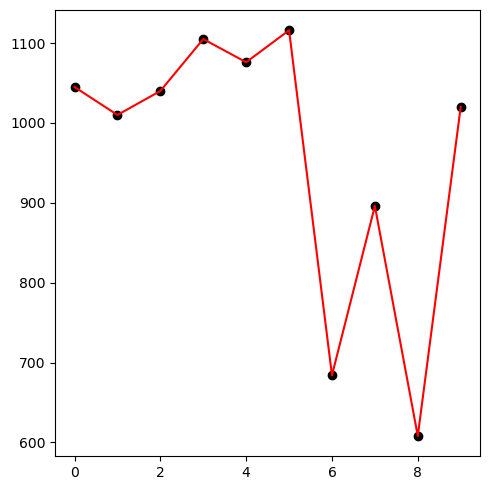

In [117]:
#overfitting because i have 12 features (from just monthly rainfall) and I have less data points than features 
fig, ax = plt.subplots()
#ax.set_color_cycle(['red', 'black', 'yellow'])
plt.scatter(x_axis, y_train, color = 'black')
plt.plot(x_axis, prediction_on_train, color ='red')

In [118]:
#doesn't seem very good, let's try quadratic
from sklearn.preprocessing import PolynomialFeatures


In [119]:
quadratic = PolynomialFeatures(degree=2, include_bias=False)
quadratic_features = quadratic.fit_transform(x_train)
quadratic_model = LinearRegression().fit(quadratic_features, y_train)

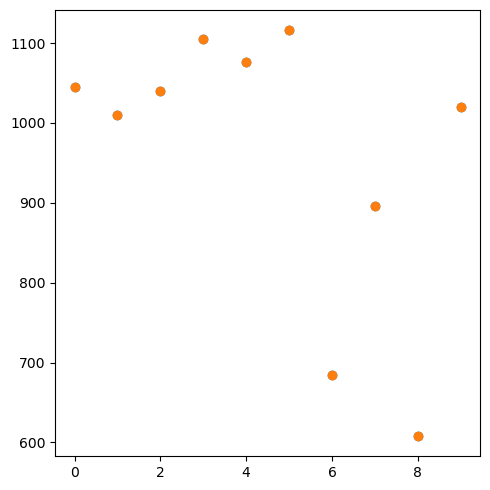

In [120]:
plt.scatter(x_axis, y_train)
plt.scatter(x_axis, quadratic_model.predict(quadratic_features))

# 2: INDIA AT LARGE: rain-yield predictor

In [121]:
# pulling data from here on india overall yields Kumar, M., Raman, R.K. and Kumar, S., Forecasting of Soybean Yield in India through
#ARIMA Model, Int. J. Pure App. Biosci. 5(5): 1538-1546 (2017). doi: http://dx.doi.org/10.18782/2320-
#7051.5834
url_yield = '../data/yield_india_soyabean_1970-2016.csv'  # https://data.gov.in/catalog/rainfall-i
url_rain = '../data/rainfall_india_1871-2016.csv'
yield_1970 = pd.read_csv(url_yield) 
rain_1871 = pd.read_csv(url_rain)
yield_1970.head(), rain_1871.head()

(   SI. No     Year  Area (million hec.)  Production (Million Tonnes)  \
 0       1  1970-71                 0.03                         0.01   
 1       2  1971-72                 0.03                         0.01   
 2       3  1972-73                 0.03                         0.03   
 3       4  1973-74                 0.05                         0.04   
 4       5  1974-75                 0.07                         0.05   
 
    Yield (Kg/hec)  
 0             426  
 1             426  
 2             819  
 3             829  
 4             768  ,
   IITM All_India v1871-2016 Rainfall PCPN Unnamed: 1
 0                                mm/month        NaN
 1                                    19.6        NaN
 2                                    10.7        NaN
 3                                    14.5        NaN
 4                                    33.9        NaN)

In [122]:
# 0 index is going to be 1871 jan, so 11th is 1871 dec, 12th is 1872 jan, 24th is 1873 jan, etc. 
# y * 12 index gives the 1871 + yth year jan 
# 1970 = 1871 + z -> z = 99 because the csv is 1 indexed (there's a dummy in 0th row)
# also there is no 1978 in the india yield data set LMAO along with 2016, so need to remove those from dataset
z = 1970 - 1871
X = rain_1871['IITM All_India v1871-2016 Rainfall PCPN'].to_numpy()[z * 12 + 1 :]
cull_index_1 = 1978 - 1970 
cull_index_2 = 2016 - 1970
X[cull_index_1 * 12], X[cull_index_2 * 12], cull_index_1, cull_index_2
cull_list = [x + (12 * cull_index_1) for x in range(12)] + [x + (12 * cull_index_2) for x in range(12)]
Y = yield_1970
X = np.delete(X, cull_list, 0)
X = X.reshape(45, -1)
X = X.astype(float)
#X_copy = np.reshape(np.zeros(len(X) * 13), (len(X), 13))
#we are appending annual rainfall to each year, induces multicollinearit
#for row_index in range(len(X)):
#    sum_to_append = np.sum(X[row_index])
#
#    X_copy[row_index] = np.append(X[row_index], sum_to_append)
#X = X_copy
Y = Y['Yield (Kg/hec)']
Y = Y.to_numpy()
Y = Y.astype(float)

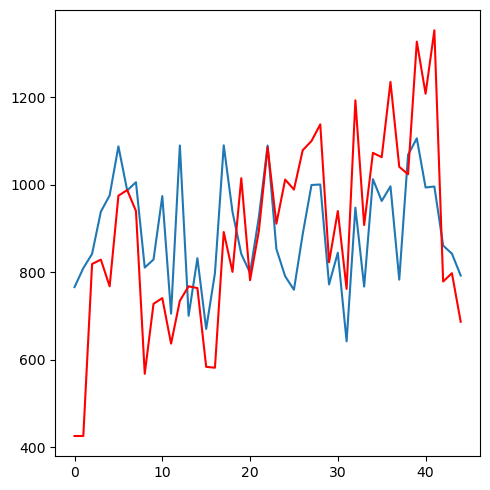

In [149]:
# nah lets not split into train and test, just run it 
lin_reg_india = LinearRegression().fit(X, Y)
y_predict = lin_reg_india.predict(X)
plt.plot([x for x in range(len(y_predict))], y_predict)
plt.plot([x for x in range(len(y_predict))], Y, color='red')

In [150]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1.296
Date:                Wed, 08 Feb 2023   Prob (F-statistic):              0.268
Time:                        11:52:59   Log-Likelihood:                -296.62
No. Observations:                  45   AIC:                             619.2
Df Residuals:                      32   BIC:                             642.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        714.9461    395.137      1.809      0.0

# 3: Multivariate Rain Distribution Generator

Text(0.5, 1.0, 'average rainfall per month (mm per all of india)')

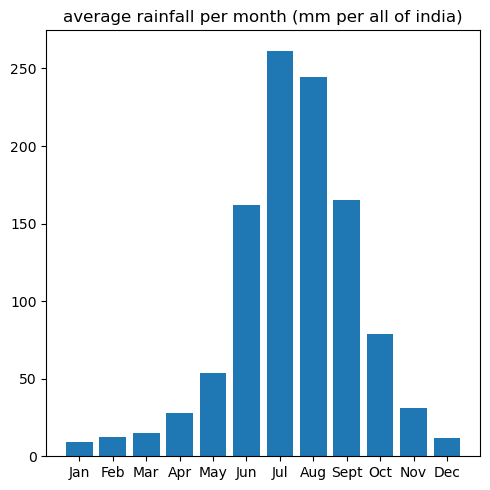

In [151]:
#create a multivariate rain distribution 
def multivar_dist(input_data):
    multivar_cov = np.cov(input_data.T)
    multivar_mean = np.mean(input_data.T, axis = 1)
    return multivar_cov, multivar_mean
    #np.random.multivariate_normal(multivar_mean, multivar_cov)
multivar_cov = multivar_dist(X)[0]
multivar_mean = multivar_dist(X)[1]
plt.bar(np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']), multivar_mean)
plt.title('average rainfall per month (mm per all of india)')

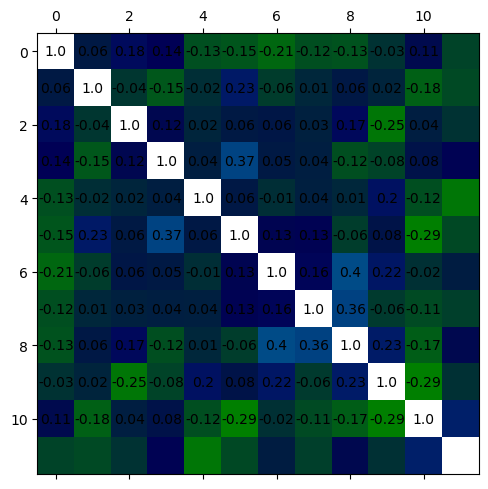

In [152]:
multivar_corr_coef = np.corrcoef(X.T)
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
min_val, max_val = 0, 11
ax.matshow(multivar_corr_coef, cmap='ocean')

for i in range(max_val):
   for j in range(max_val):
      c = round(multivar_corr_coef[j, i], 2)
      ax.text(i, j, str(c), va='center', ha='center')

plt.show()

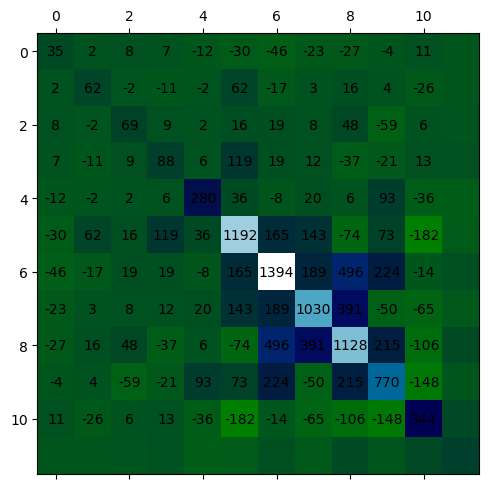

In [153]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
min_val, max_val = 0, 11
ax.matshow(multivar_cov, cmap='ocean')

for i in range(max_val):
   for j in range(max_val):
      c = int(multivar_cov[j, i])
      ax.text(i, j, str(c), va='center', ha='center')

plt.show()

In [154]:
random_years = rng.multivariate_normal(multivar_mean, multivar_cov, size = (1, 1))
random_years

array([[[ 1.08448310e+01,  2.10723205e+01,  2.89079504e+01,
         -1.00834849e-01,  6.18840803e+01,  1.33146641e+02,
          1.99399682e+02,  2.65962016e+02,  1.78667989e+02,
          7.77566812e+01,  1.86238815e+01,  1.47396838e+01]]])

# 4: Yield to Cash Function

In [156]:
# we need to develop the map from yield to cash
#data from marketing study done (2014 Solenkiatal)
# 2,195.00 2,258.00 2,290.00 2,241.00 in rupees per quintal received by the farmer
# but also 69,500.00 in returns, with costs of 32,071.44, so net income around 37,428.56
returns = 66080.00
yields = 20.65 
revenue_per_quintal = returns / yields
fixed_cost = 6251.75
variable_cost = 25711.87 - 901.43 # removed family cost as its not a direct cash cost
total_cost_per_hectare = fixed_cost + variable_cost
total_cost_per_hectare, revenue_per_quintal # 1 quintal = 100 kg of crops
def yield_to_cash_func(predicted_yield, rev_per_q = revenue_per_quintal, total_cost = total_cost_per_hectare): 
    return predicted_yield / 100 * revenue_per_quintal - total_cost

# 5: Monte Carlo Insurance Simulators

# 5a: No Policy Simulator

In [157]:
#calculate cumulative cash
def cash_accumulation(cash_each_year):
    return_list = []
    for i in range(len(cash_each_year)):
        if i == 0: 
            return_list.append(cash_each_year[i])
        else: 
            return_list.append(cash_each_year[i] + return_list[i-1])
    return return_list

In [166]:
#monte carlo from the distribution of rain years 
#now create simulation by randomly drawing from rainfall distribution, per hectare
def simulate_no_policy(n_trials, n_years, yield_predictor, yield_to_cash = yield_to_cash_func,
                         multivar_mean = multivar_mean, multivar_cov = multivar_cov, seed=98765):
    rng = np.random.default_rng(seed)
    rain_trials_years = rng.multivariate_normal(multivar_mean, multivar_cov, size = (n_trials, n_years))

    profit_n_trials = []
    cash_each_year = []
    yield_n_trials = []
    for i in range(n_trials):
        trial_i = rain_trials_years[i]

        yield_i = yield_predictor.predict(trial_i)

        yield_n_trials.append(yield_i)
        cash_change = yield_to_cash(yield_i)

        cash_each_year.append(cash_change)
        profit_n_trials.append(np.sum(cash_change))
    return profit_n_trials, yield_n_trials, rain_trials_years, cash_each_year
no_policy_output = simulate_no_policy(100, 10, lin_reg_india)
# single hectare
# under these assumptions, insurance less always results in a loss in the long run 
no_policy_total_profit, no_policy_yield, no_policy_rain, no_policy_cash = no_policy_output[0], no_policy_output[1], no_policy_output[2], no_policy_output[3]
print(np.mean(no_policy_profit))
#plt.plot(no_policy_profit)
len(no_policy_cash[0])
len(no_policy_total_profit)

-5725.5319069751895


100

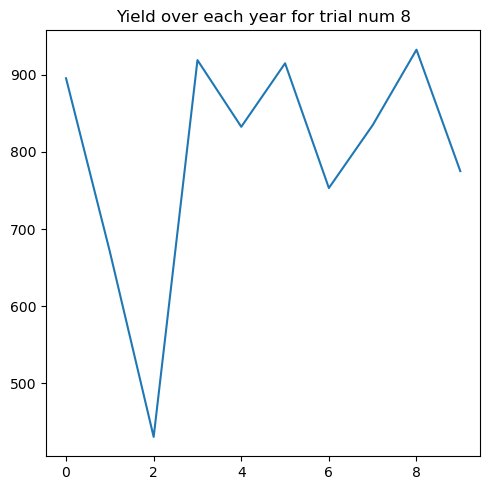

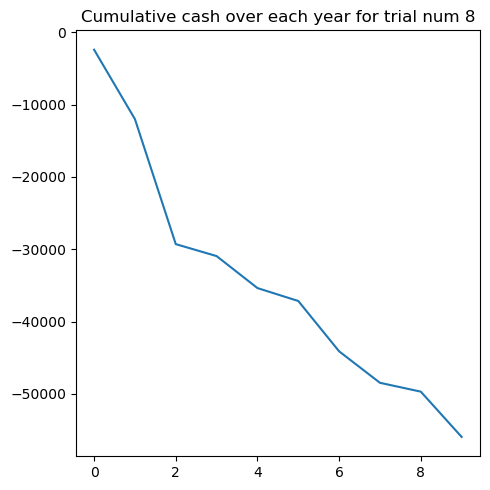

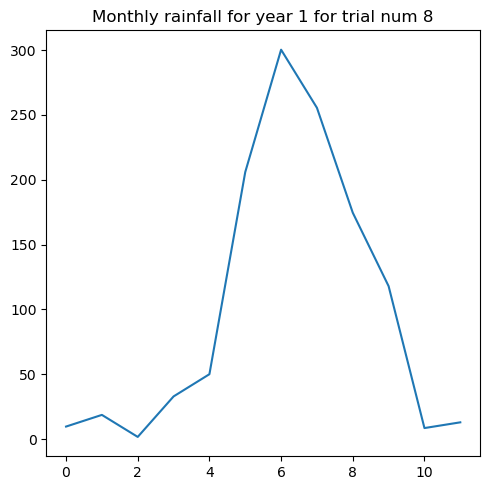

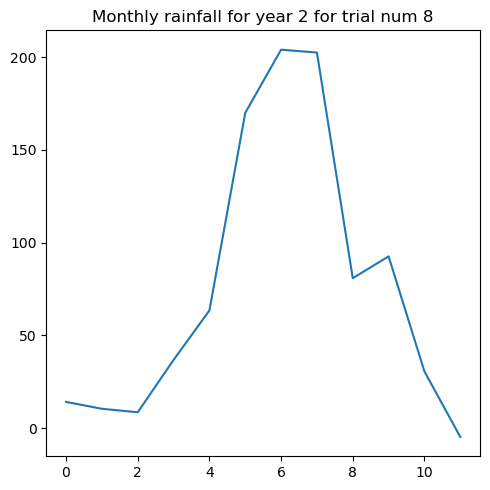

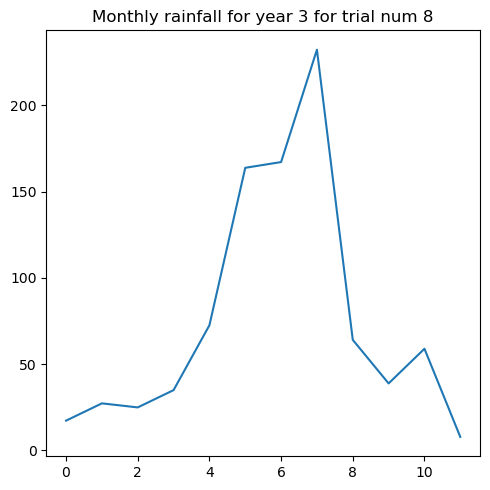

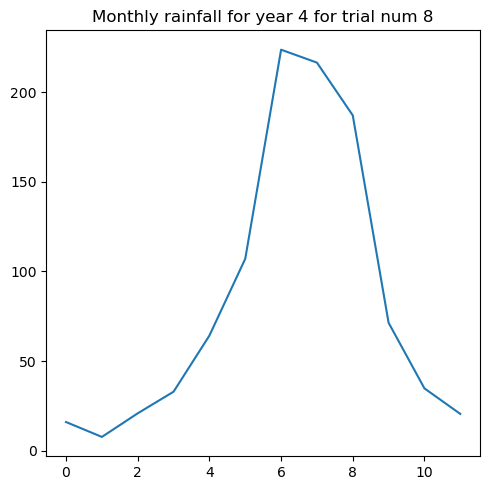

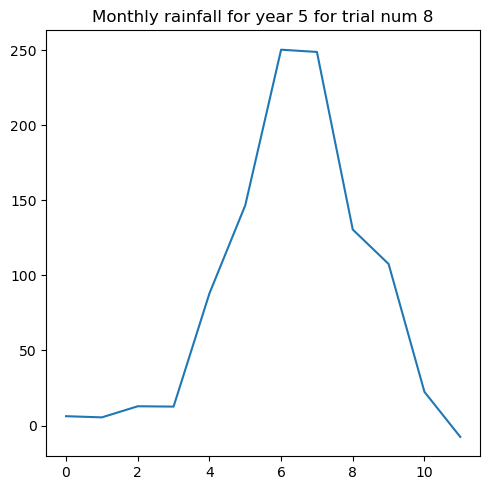

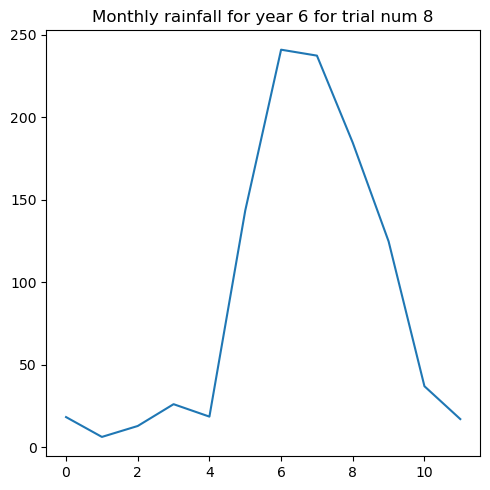

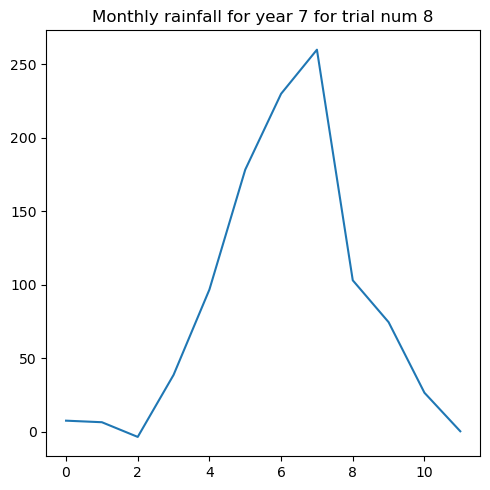

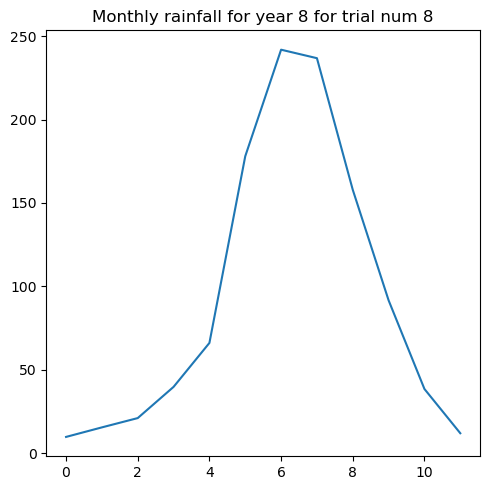

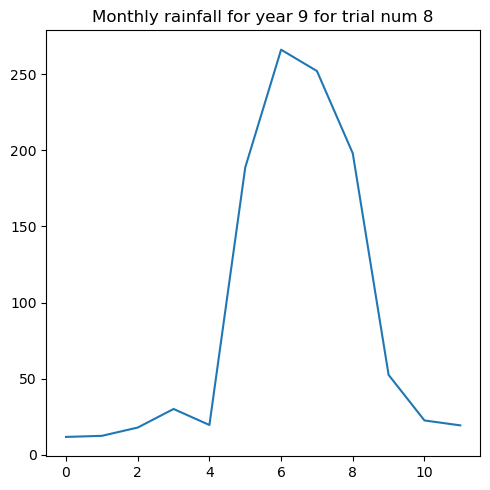

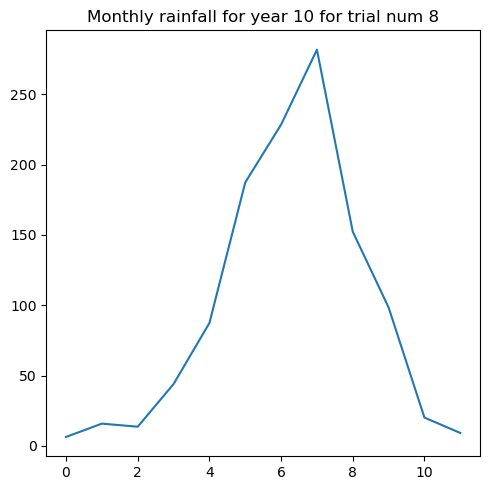

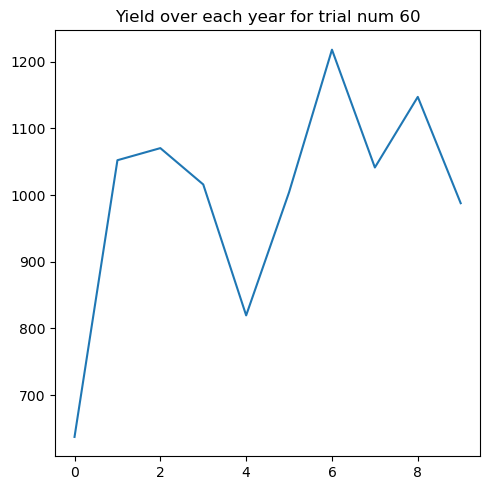

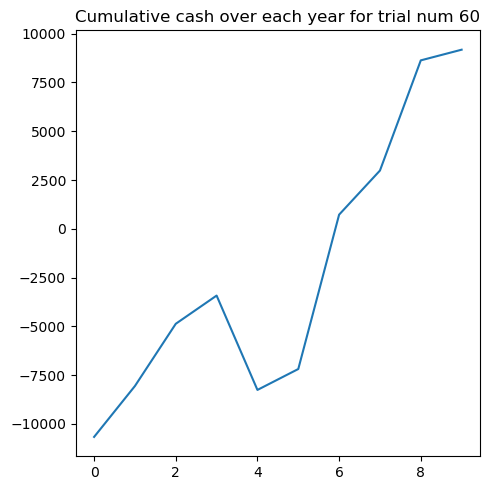

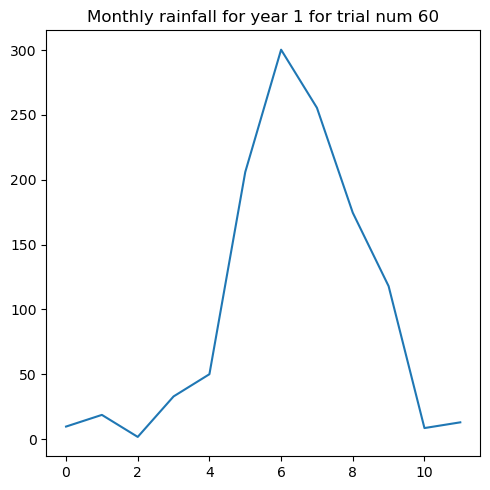

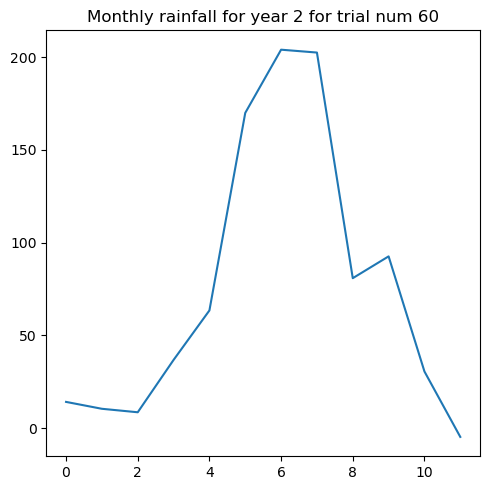

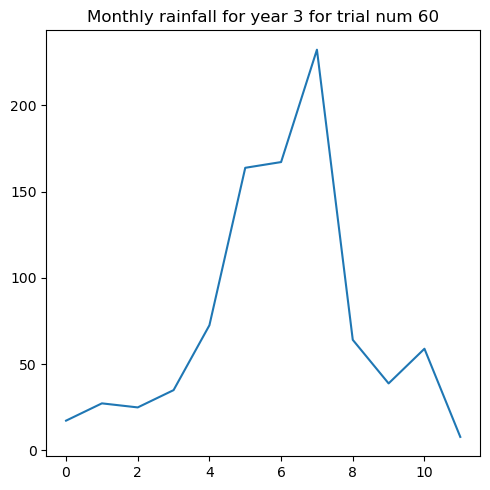

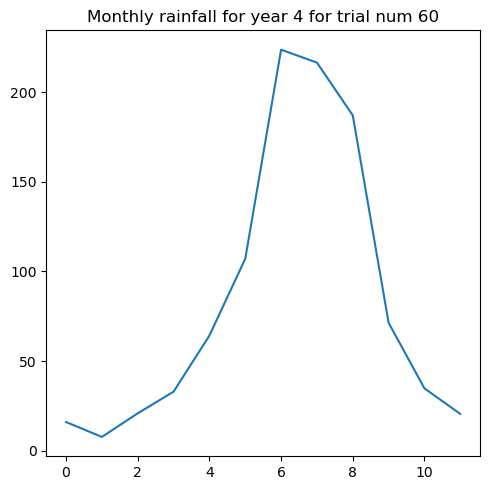

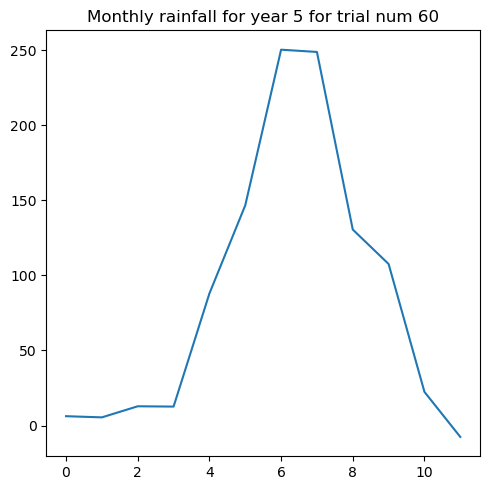

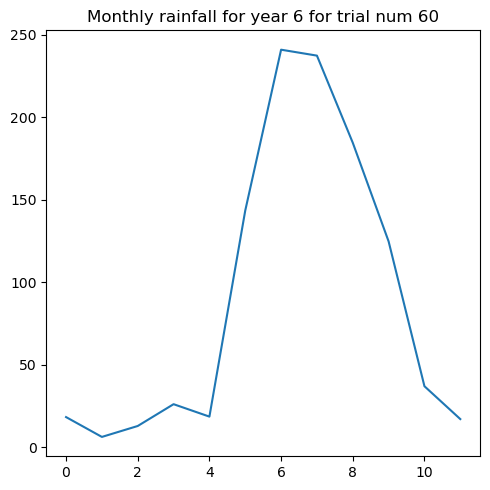

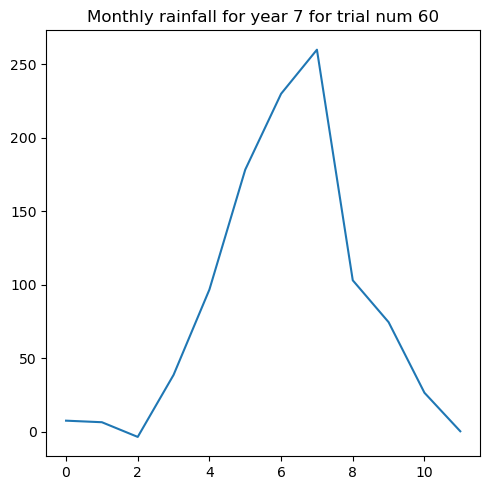

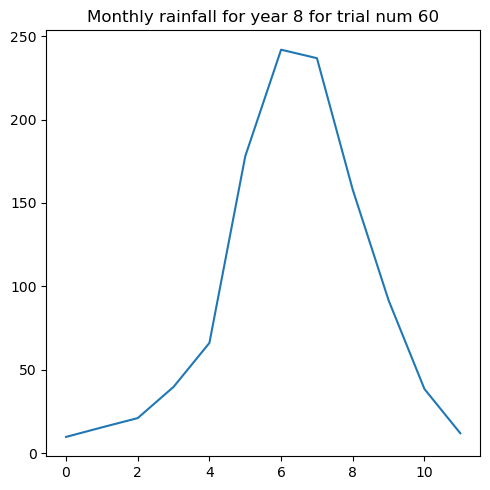

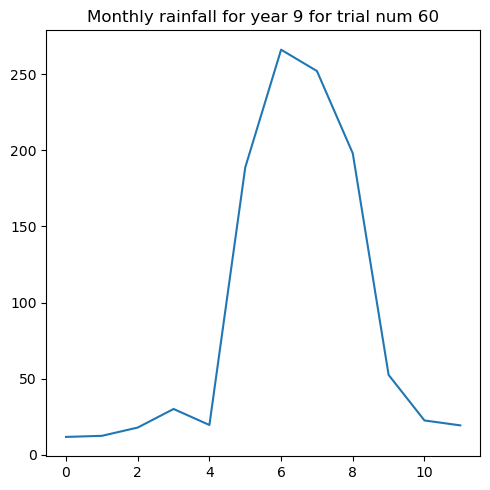

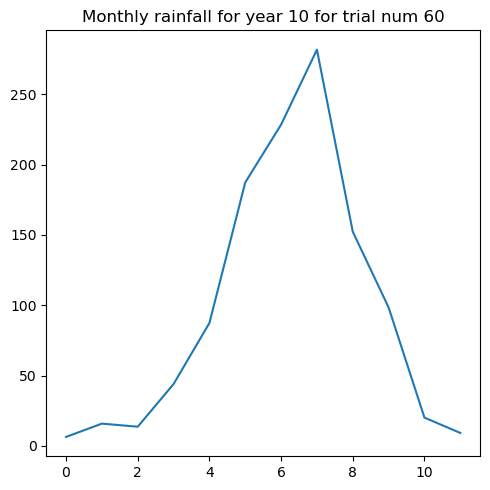

('Total Profit for trial_num 8: -25525.02712033649',
 'Total Profit for trial_num 60: -25525.02712033649')

In [168]:
# plotting of simulation outputs
def plot_summary_trial(sim_out, trial_num = 0): 
    profit, yields, rain, cash = sim_out[0], sim_out[1], sim_out[2], sim_out[3]
    #plot yields
    plt.figure()
    plt.title("Yield over each year for trial num " + str(trial_num))
    plt.plot(yields[trial_num])
    #plot cash
    plt.figure()
    plt.title("Cumulative cash over each year for trial num " + str(trial_num))
    plt.plot(cash_accumulation(cash[trial_num]))
    #plot monthly rainfall per year
    for _ in range(len(no_policy_rain[8])):
        plt.figure(str(_))
        plt.title("Monthly rainfall for year " + str(_ + 1) + " for trial num " + str(trial_num))
        plt.plot(no_policy_rain[8][_])
    plt.show()
    return "Total Profit for trial_num " + str(trial_num) + ": " + str(np.mean(profit))
plot_summary_trial(no_policy_output, 8), plot_summary_trial(no_policy_output, 60)



In [174]:
#monte carlo from the distribution of rain years 
#now create simulation by randomly drawing from rainfall distribution, per hectare

#Outputs: 
# Total farmer profit for a trial, the yields, the rains, the cash_from_yield, total_farmer_cash, insurance_company_cash, number_of_payouts
def insurance_sim(n_trials, n_years, yield_predictor, insurance_premium, rain_to_insurance, insurance_amount = 1, yield_to_cash = yield_to_cash_func,
                         multivar_mean = multivar_mean, multivar_cov = multivar_cov, seed=98765):
    rng = np.random.default_rng(seed)
    rain_trials_years = rng.multivariate_normal(multivar_mean, multivar_cov, size = (n_trials, n_years))
    profit_n_trials = []
    cash_yield = []
    total_farmer_cash = []
    yield_n_trials = []
    insurance_company_cash = []
    num_payout = 0
    for i in range(n_trials):
        rain_i = rain_trials_years[i]
        yield_i = yield_predictor.predict(rain_i)
        yield_n_trials.append(yield_i)
        cash_from_yield = yield_to_cash(yield_i)
        cash_yield.append(cash_from_yield)

        # determine the insurance payment and payout, this returns a vector for each year
        insurance_payout = rain_to_insurance(rain_i)
        num_payout += np.sum([1 if x > 0 else 0 for x in insurance_payout])
        ins_cash_exchange = insurance_amount * (insurance_premium - insurance_payout)
        insurance_company_cash.append(ins_cash_exchange)
        total_farmer_cash.append(cash_from_yield - ins_cash_exchange)



        percentage_payout = (num_payout / (n_trials * n_years))
        profit_n_trials.append(np.sum(cash_from_yield))
    return profit_n_trials, yield_n_trials, rain_trials_years, cash_from_yield, total_farmer_cash, insurance_company_cash, percentage_payout

In [173]:
prem = 100
single_payout = 1000
lower_threshold = 600
# this policy is simple, if sum of rain in monsoon is < 600 mm
def single_lower_threshold(rain_2d_array, threshold = lower_threshold, payout = single_payout):
    payout_list = [payout if np.sum(year[6:]) < threshold else 0 for year in rain_2d_array]
    return payout_list
single_lower_threshold(np.zeros((10,12)))


[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [ ]:
insurance_sim(100, 10, lin_reg_india, prem, single_lower_threshold, )